<center> <h1>Numerical Methods  -- Assignment 4</h1> </center>

## Problem 1 -- Integration 

Find the value for $x=2:
$$$erf[x]=2/\sqrt{\pi}\int_{0}^{x}e^{-z^2}dz$$
for and acurracy of $\epsilon=10 ^{-6}$.

### (a)Trapezoidal rule

In mathematics, the trapezoidal rule is a technique for approximating the definitive integral
$$\int_{a}^{b}f(x)\,dx$$
It works by approximating the region under the graph of the function $f(x)$ as a trapezoid and calculating its area:
$$\int_{a}^{b}f(x)dx \approx (b-a)\left[\frac{f(a)+f(b)}{2}\right]$$

In [1]:
from math import *
import numpy as np
from scipy.integrate import trapz,romberg
from scipy.special import erf

#write a function to calculate steps needed to achieve accuracy of 1e-6
def steps(eva):
    steps = 1
    x = np.linspace(0.,2.,steps+1, endpoint=True)
    y = 2./np.sqrt(pi)*np.exp(-x**2)
    integral = eva(y,x)
    print'%12s  %12s  %12s' % ("Steps", "StepSize", "Results")
    while abs(integral-erf(2))>1e-6:
        x = np.linspace(0.,2.,steps+1, endpoint=True)
        y = 2./np.sqrt(pi)*np.exp(-x**2)
        integral = eva(y,x)
        print '%12s  %12s  %12s' % (steps, 2./steps, integral)
        steps *= 2

print steps(trapz)

       Steps      StepSize       Results
           1           2.0  1.14904615245
           2           1.0  0.989630573645
           4           0.5  0.993671720902
           8          0.25  0.994896189688
          16         0.125  0.995214904823
          32        0.0625  0.995295372402
          64       0.03125  0.99531553858
         128      0.015625  0.995320583204
         256     0.0078125  0.995321844552
None


### (b) Simpson's rule

In numerical analysis, Simpson's rule is a method for numerical integration, given by the approximation as follows:
$$\int_{a}^{b}f(x)\,dx \approx \frac{b-a}{6}\left(f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right)$$
for points that are equally spaced.

In [2]:
from scipy.integrate import simps

#Now call the same function but execute on simps
print steps(simps)


       Steps      StepSize       Results
           1           2.0  1.14904615245
           2           1.0  0.936492047377
           4           0.5  0.995018769988
           8          0.25  0.99530434595
          16         0.125  0.995321143201
          32        0.0625  0.995322194928
None


### (c) Romberg's method

In numerical analysis, Romberg's method is used to estimate the definite integral repeatedly by applying Richardson extrapolation. The integral 
$$I(f) = \int_{a}^{b}f(x)dx$$
is approximated using the $Composite \ Trapezoidal \ Rule$ with step sizes $h_k = (b-a)2^{-k}$, where $k$ is a nonnegative integer. Then, for each $k$, Richardson extrapolation is used $k-1$ times to previously computed approximations in order to improve the order of accuracy as much as possible. The algorithm of Romberg Integration is as follows:
* Given the defined domain (a, b) where approximation of integration is carried out;
* Initialise $h = b - a$;
* For $j = 1,2,...,$:
     $$T_{j,1}=\frac{h}{2}\left[f(a)+\sum_{j=1}^{2^{j-1}-1}f(a+jh)+f(b)\right] \ Composite \ Trapezoidal \ Rule$$
          For k=2,3,...,:
    $$T_{j,k}=T_{j,k-1}+\frac{T_{j,k-1}-T_{j-1,k-1}}{4^{k-1}-1} \ Richardson \ Extrapolation$$
          h = h/2

In [3]:
from scipy.integrate import romberg

#romberg has the 'show' parameter to display results step by step
gaussian = lambda x: 2./np.sqrt(pi)*np.exp(-x**2)
result = romberg(gaussian,0.,2.,show=True)
print result,erf(2)

Romberg integration of <function vfunc at 0x111c77578> from [0.0, 2.0]

 Steps  StepSize   Results
     1  2.000000  1.149046 
     2  1.000000  0.989631  0.936492 
     4  0.500000  0.993672  0.995019  0.998921 
     8  0.250000  0.994896  0.995304  0.995323  0.995266 
    16  0.125000  0.995215  0.995321  0.995322  0.995322  0.995322 
    32  0.062500  0.995295  0.995322  0.995322  0.995322  0.995322  0.995322 
    64  0.031250  0.995316  0.995322  0.995322  0.995322  0.995322  0.995322  0.995322 

The final result is 0.995322265019 after 65 function evaluations.
0.995322265019 0.995322265019


### (d) Conclusion

#### Steps

We can see from the three different approaches that trapezoidal method takes the longest time and reaches an accuracy of $\epsilon=10^{-6}$ after 8 loops ( $2^8$ steps ). While Simpson's method behaves moederately and reached the required accuracy after 5 loops( 32 steps ). The Romberg approach is the best amongst three, it reached the desired accuracy after a mere 16 function evaluations, this means that it has satisfied the requirment at a step number of 16 (as can be seen from the printed results above the numerical integration value was 0.995322 which is within 6 digits accurate to the value found by the scipy erf function). Given all aove we can come to an conclusion that Romberg approach displayed the best performance in evaluating the numerical integration of the given function $e^{-z^2}$ in a given domain ( 0, 2 ).

#### Differences 

For both the trapezoidal method and Simpson's method, a more accurate value is obtained by increasing the number of steps, whereas the last method, Romberg method, a more accurate result actually stems from a previous less accurate result, and thus to decrease the error in the allowed tolerance.

## Problem 2 -- Integration, an example

Find the value of the integral
$$\int_{-8}^{8}dx/x^{1/3}$$
numerically and analytically.

### (a) Numerical solution

In [106]:
import scipy
from scipy.integrate import quad

def complex_quadrature(func, a, b, **kwargs):
    def real_func(x):
        return scipy.real(x)
    def imag_func(x):
        return scipy.imag(x)
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    integral = quad(lambda x: x,a,b,**kwargs)
    return (real_integral[0] + 1j*imag_integral[0],real_integral[1],integral[0])


In [107]:
print complex_quadrature(lambda x: scipy.power(x,-1./3),-8,8,points=[0])


(0j, 7.105427357601002e-13, 0.0)


We found the value to be zero, with an error of an order of $10^{-13}$

So we can see that either treat this problem in the complex plane or in the real doamin we can come to the conclusion that the integration is zero. Alternatively we can solve this problem by taking a large sample of x and evaluate the sum of $x^{2/3}$, as shown below:

In [105]:
from math import *
def func2(x):
    return 1./np.cbrt(x) #numpy.cbrt calculates the cubic root 
N = 10000

x2 = np.linspace(-8,8,N,endpoint = True)
h =x2[1]-x2[0]
y2 = func2(x2)
newy = (y2[2:] + y2[1:-1])/2
print(h*sum(newy))

0.000800106683543


### (b) Analytical solution

First, find the numerical value:
\begin{align*}
\int_{-8}^{8}dx/x^{1/3} &= \frac{3}{2}\int_{-8}^{8}d(x^{2/3})\\
&=\frac{3}{2}\left(8^{2/3}-(-8)^{2/3}\right)\\
&=\frac{3}{2}(4-4)\\
&=0
\end{align*}

Take a first look at the integrand, we can easily find that it has a singularity at $x=0$, yet at a point which is infinitesimally close to the singularity the integrand is still within its defined domain. Secondly, the upper and lower limits are symmetric around the singularity so if the function of the integrand is also symmetric about its singularity we can in principle integrate on one side and the for the other side we can just flip sign or assign an equal value depending on the symmetry relations of the function itself. It turns out that $x^{-1/3}$ is an odd function, which can be proven very simply by $$x^{-1/3}=x^{2/3-1}=\frac{\sqrt[3]{x^2}}{x}=-\frac{\sqrt[3]{(-x)^2}}{(-x)}$$

## Problem 3 -- Spherical density profile

A galaxy which has a spherical stellar density profile described by the power law
$$\rho(r) = \frac{\rho_0}{r/r_s(1+(r/r_s)^{1/\alpha})^{(\beta-1)/\alpha}}$$
Consider an NFW profile ($\alpha=1,\beta=3$) and Hernquist profile ($\alpha = 1,\beta = 4$), assuming $\rho_0 = 10^6 \ M_{\odot}/kpc^3$, and $r_s = 1 \ kpc$.

### (a) Surface brightness profile

$$\Sigma(R) = \int_{R}^{\infty}\rho(r)\frac{r}{\sqrt{r^2-R^2}}\,dr$$
with $R\in[0.1,8] \ kpc$

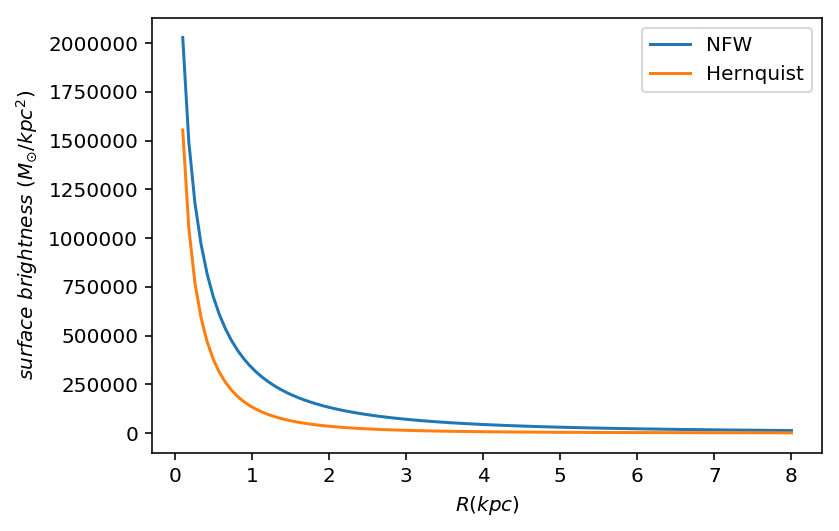

In [5]:
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt

rho0 = 1e6
rs = 1.
def brightness(a,b,R):
    bright = lambda r,R: rho0/(r/rs*
    (1+np.power((r/rs),1./a))**((b-1.)*a))*r/np.sqrt(r**2-R**2)
    y = quad(bright,R,np.inf,args=(R,))
    return y[0]

R = np.linspace(0.1,8,101,endpoint=True)
brightness_v = np.vectorize(brightness)
y_NFW = brightness_v(1,3,R)
y_H = brightness_v(1,4,R)

#plot the result
plt.plot(R, y_NFW,'-',label='NFW')
plt.plot(R, y_H,'-',label='Hernquist')
plt.xlabel(r"$R(kpc)$")
plt.ylabel(r"$surface \ brightness \ (M_{\odot}/kpc^2)$")
plt.legend()
plt.show()

### (b) Enclosed stellar mass

$$M = \int_{0}^{R_{max}}4\pi r^2 \rho(r)\,dr$$

In [119]:
a = 1; b = 3
mass = lambda r: rho0/((r/rs)*
(1+np.power((r/rs),1./a))**((b-1.)*a))*4*pi*r**2 
y_mass = quad(mass,0,250)
print "The enclosed mass of a NFW profile is found to be %e"%y_mass[0],"M_sun"
a = 1; b = 4
mass = lambda r: rho0/((r/rs)*
(1+np.power((r/rs),1./a))**((b-1.)*a))*4*pi*r**2 
y_mass = quad(mass,0,250)
print "The enclosed mass of a Hernquist profile is found to be %e" %y_mass[0],"M_sun"

The enclosed mass of a NFW profile is found to be 5.691858e+07 M_sun
The enclosed mass of a Hernquist profile is found to be 6.233220e+06 M_sun


### (c) Gravitational potential

$$\Phi(r) = -4\pi G\left[\frac{1}{r}\int_{0}^{r}\rho(r)r^2\,dr + \int_{r}^{\infty}\rho(r)r\,dr\right]$$
The gravitational constant in astrophysics is often expressed as 
\begin{align*}
G &\approx 4.302 \times 10^{-3} pc \ M_{\odot} ^{-1}(km/s)^2\\
& \approx 4.302 \times 10^{-6} kpc \ M_{\odot} ^{-1}(km/s)^2
\end{align*}
This gives the unit of gravitational potential to be $(km/s)^2$.

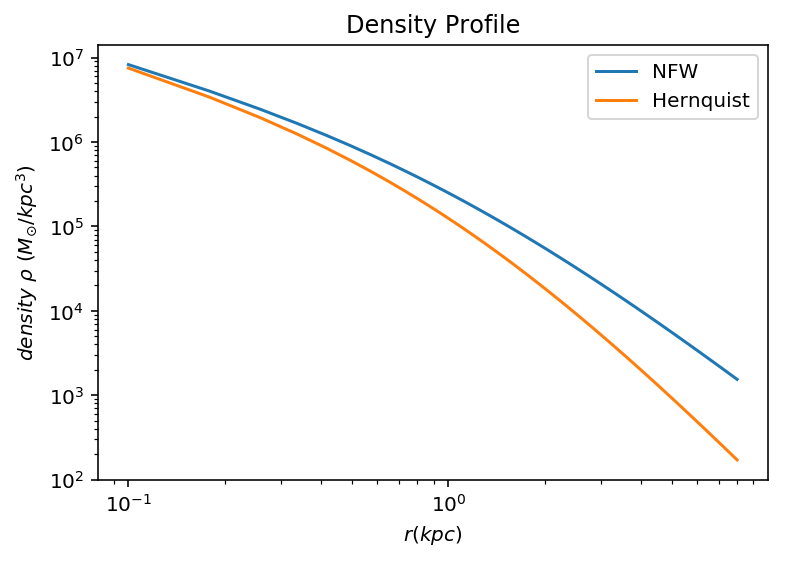

In [126]:
def density(r,a,b):
    l = rho0/(r/rs*
(1+np.power((r/rs),1./a))**((b-1.)*a))
    return l

def Phi(a,b,r):
    G = 4.302e-6 # in the unit of kpc M_sun^-1 (km/s)^2
    f1 = lambda r,a,b: density(r,a,b)*r**2 
    f2 = lambda r,a,b: density(r,a,b)*r
    g1 = 1./r*quad(f1,0,r,args=(a,b,))[0]
    g2 = quad(f2,r,np.inf,args=(a,b,))[0]
    y = -4*pi*G*(g1+g2)
    return y
r = R
Phi_v = np.vectorize(Phi)
Y_NFW = Phi_v(1,3,r)
Y_H = Phi_v(1,4,r)
Y_div = Phi_v(3,1,r)
Y1 = density(r,1,3)
Y2 = density(r,1,4)
#plot the result

plt.loglog(r,Y1,'-',label='NFW')
plt.loglog(r,Y2,'-',label="Hernquist")
plt.title("Density Profile")
plt.xlabel(r"$r(kpc)$")
plt.ylabel(r"$density \ \rho \ (M_{\odot}/kpc^3)$")
plt.legend()
plt.show()

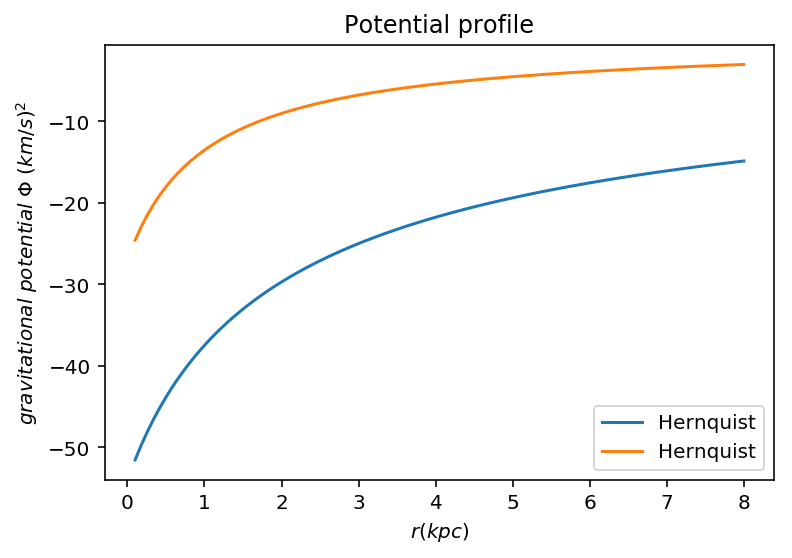

In [128]:
#plot the result

plt.title("Potential profile")
plt.plot(r, Y_NFW,'-',label='Hernquist')
plt.plot(r, Y_H,'-',label='Hernquist')
plt.xlabel(r"$r(kpc)$")
plt.ylabel(r"$gravitational \ potential \ \Phi \ (km/s)^2$")
plt.legend()
plt.show()

By taking $\alpha = 3, \beta = 1$, we can have a potential profile with potential negatively relatied to distance, as plotted below.

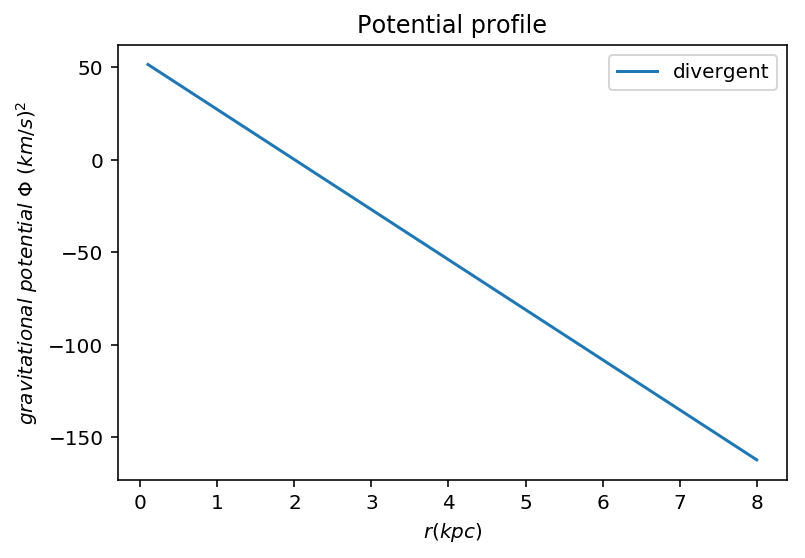

In [131]:
#plot the result

plt.title("Potential profile")
plt.plot(r,Y_div,'-',label="divergent")
plt.xlabel(r"$r(kpc)$")
plt.ylabel(r"$gravitational \ potential \ \Phi \ (km/s)^2$")
plt.legend()
plt.show()